# Clean the '[Nepali Sentiment Analysis](https://www.kaggle.com/datasets/aayamoza/nepali-sentiment-analysis)' dataset

In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '../../../'))
sys.path.append(project_root)

In [3]:
DATASET_PATH = os.path.join(
    project_root,
    'nepali_sentiment_analysis',
    'dataset',
    'raw'
)
print(os.listdir(DATASET_PATH))

['sentiment_analysis_nepali_final.csv', 'test.csv', 'train.csv', 'unique_tweets']


In [4]:
df = pd.read_csv(os.path.join(DATASET_PATH, 'sentiment_analysis_nepali_final.csv'))
df.head()

,id,Sentences,Sentiment
0,0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1
1,1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1
2,2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1
3,3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1
4,4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1


In [5]:
df = df.drop(columns=['id'])
df = df.reset_index(drop=True)
df.head()

,Sentences,Sentiment
0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे ।...",1
1,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1
2,कति राम्रो शिव मन्दिर देख्न पाइयो कुन ठाउको हो...,1
3,मारुनी भन्ने वितिकै सामान्य नाचनीमा आधारित कथा...,1
4,यो फ्लिम हेरिसकेपछी थाहा भयो कि किन दर्सकहरुले...,1


In [6]:
print("Info:")
print(df.info())
print("-" * 50)
print("Describe:")
print(df.describe())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35789 entries, 0 to 35788
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentences  35789 non-null  object
 1   Sentiment  35789 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 559.3+ KB
None
--------------------------------------------------
Describe:
          Sentiment
count  35789.000000
mean       0.041130
std        0.919035
min       -1.000000
25%       -1.000000
50%        0.000000
75%        1.000000
max        1.000000


In [7]:
print(df['Sentiment'].value_counts())

Sentiment
 1    15880
-1    14408
 0     5501
Name: count, dtype: int64


In [8]:
# map -1 to 2, 0 to 0 and 1 to 1
df['Sentiment'] = df['Sentiment'].map({-1: 2, 0: 0, 1: 1})

In [9]:
print(df['Sentiment'].value_counts())

Sentiment
1    15880
2    14408
0     5501
Name: count, dtype: int64


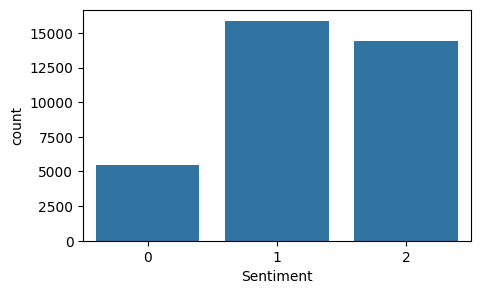

In [10]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Sentiment')
plt.show()

In [11]:
# Step 1: Split the sentences into separate rows based on '।' or '?'
df_split = df['Sentences'].str.split(r'[।?]').explode().str.strip().reset_index(drop=True)

# Step 2: Repeat the Sentiment for each sentence
df_final = df.loc[df.index.repeat(df['Sentences'].str.split(
    r'[।?]').apply(len))].reset_index(drop=True)

# Step 3: Align the sentiment column with the newly split sentences
df_final['Sentences'] = df_split

# Reset the index for the final DataFrame
df_final = df_final.reset_index(drop=True)

In [12]:
df_final.head(20)

,Sentences,Sentiment
0,"म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे",1
1,सामुदायिक विद्यालयमा अध्यापन गराउछु,1
2,मलाइ यो चलचित्रले मन नै छोयो,1
3,वास्तविक घटना यहि हो कि नेपालका तमाम सामुदायिक...,1
4,यस्तै शिक्षा सम्बन्धीको चलचित्र बनोस भनेर अपेक...,1
5,धन्यवाद सबै लाइ,1
6,म सरकारी स्कूल/कलेजमा पढेर करीब १२ बर्ष भन्दा ...,1
7,फिल्म सन्देशमुलक छ,1
8,सबैले हेर्नुहोला,1
9,,1


In [13]:
print(df_final['Sentiment'].value_counts())

Sentiment
1    16142
2    14544
0     5571
Name: count, dtype: int64


In [14]:
# check for duplicates
print(df_final.duplicated().sum())

373


In [15]:
# show the duplicates
df_final[df_final.duplicated()]

,Sentences,Sentiment
17,,1
20,,1
31,,1
32,,1
35,,1
...,...,...
28791,परीक्षणको दायरालाई वृद्धि गर्न आजदेखि धनगढी ने...,1
28792,कोभिड हजार जनाको नमुना परीक्षण,2
28799,कोभिड को सङ्क्रमित व्यक्ति भेटिएको भन्दै अफवाह...,2
28800,कोभिड अपडेट संक्रमित को मृत्यु कुन देशमा कति म...,2


In [16]:
# display the Sentences column for the data at row 28791
df_final.loc[28791, 'Sentences']

'परीक्षणको दायरालाई वृद्धि गर्न आजदेखि धनगढी नेपालगञ्ज र पोखरामा ठूला मेशिनको जडान भइरहेको छ स्वास्थ्य मन्त्रालयका प्रवक्ता डा विकास देवकोटाले भने भोलिदेखि नै ती मेशिनबाट परीक्षण शुरू हुनेछ कोभिड कोरोना'

In [17]:
# display the rows containing the data ''
df_final[df_final['Sentences'] == 'परीक्षणको दायरालाई वृद्धि गर्न आजदेखि धनगढी नेपालगञ्ज र पोखरामा ठूला मेशिनको जडान भइरहेको छ स्वास्थ्य मन्त्रालयका प्रवक्ता डा विकास देवकोटाले भने भोलिदेखि नै ती मेशिनबाट परीक्षण शुरू हुनेछ कोभिड कोरोना']

,Sentences,Sentiment
28775,परीक्षणको दायरालाई वृद्धि गर्न आजदेखि धनगढी ने...,1
28791,परीक्षणको दायरालाई वृद्धि गर्न आजदेखि धनगढी ने...,1


In [18]:
# check if any row contains english characters in the 'Sentences' column and print the row
print(df_final[df_final['Sentences'].str.contains(r'[a-zA-Z]')])

Empty DataFrame
Columns: [Sentences, Sentiment]
Index: []


In [19]:
# drop duplicates
df_final = df_final.drop_duplicates()

In [20]:
print(df_final.duplicated().sum())

0


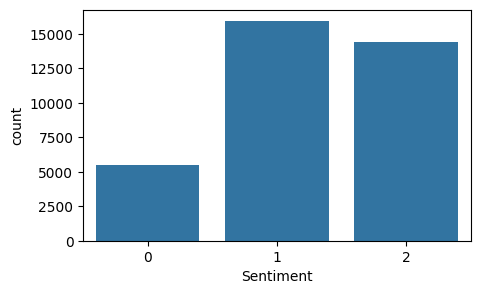

In [21]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df_final, x='Sentiment')
plt.show()

---

In [22]:
import re
from utils.preprocess import remove_html_tags, remove_extra_whitespace

In [23]:
def preprocess(text):
    """
    Preprocesses a text string to retain only Nepali characters, numbers, and specific punctuation.
    Removes HTML tags, mentions, URLs, and extra whitespaces.
    
    Args:
        text (str): The input text to preprocess.
    
    Returns:
        str: The preprocessed text.
    """
    # Remove HTML tags
    text = remove_html_tags(text)

    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Remove URLs
    text = re.sub(r'http.?://[^\s]+[\s]?', '', text)

    # Retain only Nepali character, and punctuations (? and Nepali purnabiram)
    text = re.sub(r'[^\u0900-\u097F०-९।?]', ' ', text)

    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [24]:
text = df_final.iloc[1598]['Sentences']

cleaned_text = preprocess(text)

print(f"Original text:\n{text}")
print(f"\nCleaned text:\n{cleaned_text}")

Original text:
पुरुष भनेर ठाडो शिर बनाएर हिड्नु नि गार्हो यि पृथिवी को भार हरुले गर्दा

Cleaned text:
पुरुष भनेर ठाडो शिर बनाएर हिड्नु नि गार्हो यि पृथिवी को भार हरुले गर्दा


In [25]:
from tqdm import tqdm
tqdm.pandas()

# Apply the preprocess_text function to the 'text' column
df_final.loc[:, 'Sentences'] = df_final['Sentences'].progress_apply(preprocess)

  0%|          | 0/35884 [00:00<?, ?it/s]

100%|██████████| 35884/35884 [00:00<00:00, 82803.57it/s]


In [26]:
df_final.head()

,Sentences,Sentiment
0,म एक शिक्षक शिक्षा क्षेत्रमा रमाएको मान्छे,1
1,सामुदायिक विद्यालयमा अध्यापन गराउछु,1
2,मलाइ यो चलचित्रले मन नै छोयो,1
3,वास्तविक घटना यहि हो कि नेपालका तमाम सामुदायिक...,1
4,यस्तै शिक्षा सम्बन्धीको चलचित्र बनोस भनेर अपेक...,1


In [27]:
df_final.shape

(35884, 2)

In [28]:
# check for duplicate rows based on the 'Sentences' column
duplicates = df_final[df_final.duplicated(subset=['Sentences'], keep=False)]
duplicates

,Sentences,Sentiment
9,,1
23,,2
892,,1
1009,मनपरि नबोलौँ भन्छु साला यस्तै पोष्ट देखेपछि दि...,1
1069,,0
...,...,...
28795,अहिले पनि झण्डै डेढ सय आयोजनामा एक लाख हजार का...,1
28796,हालसम्म टेकुस्थित राष्ट्रिय जनस्वास्थ्य प्रयोग...,1
28797,कोभिड द्धारा नेपालमा सृजित हुने प्रभावबारे त्र...,0
28798,कोभिड ले स्वास्थ्य खर्च अकासिने अर्थतन्त्र मन्...,2


In [29]:
df_final[df_final['Sentences'] == 'ताइ न तुइ को फिलिम']

,Sentences,Sentiment
88,ताइ न तुइ को फिलिम,2


In [30]:
df_final = df_final.drop_duplicates(subset=['Sentences'], keep='first')

In [31]:
# show the number of duplicate rows based on column 'Sentences'
print(f"Number of duplicate rows: {df_final.duplicated(subset=['Sentences']).sum()}")

Number of duplicate rows: 0


In [32]:
# show the number of null values in each column
print(df_final.isnull().sum())

Sentences    0
Sentiment    0
dtype: int64


In [33]:
df_final.shape

(35847, 2)

In [34]:
print(df_final['Sentiment'].value_counts())

Sentiment
1    15952
2    14421
0     5474
Name: count, dtype: int64


In [35]:
# find the rows with Sentences column as empty string, not null
df_final[df_final['Sentences'] == '']

,Sentences,Sentiment
9,,1


In [36]:
# remove the rows with empty string in the 'Sentences' column
df_final = df_final[df_final['Sentences'] != '']

In [37]:
OUTPUT_DIR = os.path.join(
    project_root,
    'nepali_sentiment_analysis',
    'dataset',
    'cleaned'
)

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

OUTPUT_PATH = os.path.join(
    OUTPUT_DIR,
    'cleaned_sentiment_analysis_nepali_final.csv'
)

df_final.to_csv(OUTPUT_PATH, index=False)
if os.path.exists(OUTPUT_PATH):
    print(f"File saved at {OUTPUT_PATH}")
else:
    print("File not saved")

File saved at c:\Users\Suyash Shrestha\Personal\_Nepali_news_project\Nepali_News_algorithms\news_algorithms\nepali_sentiment_analysis\dataset\cleaned\cleaned_sentiment_analysis_nepali_final.csv
